In [1]:
import numpy as np
import pandas as pd

In [2]:
daily_sentiment = pd.read_csv('./data/daily.csv')

In [3]:
print(daily_sentiment)

     day  month    year  sentiment  tweet_count
0    6.0    4.0  2009.0   NEGATIVE         1425
1    6.0    4.0  2009.0   POSITIVE         1934
2    7.0    4.0  2009.0   NEGATIVE         7149
3    7.0    4.0  2009.0   POSITIVE        10162
4   17.0    4.0  2009.0   POSITIVE         1840
..   ...    ...     ...        ...          ...
83  22.0    6.0  2009.0   NEGATIVE        12009
84  23.0    6.0  2009.0   NEGATIVE        17002
85  24.0    6.0  2009.0   NEGATIVE         6299
86  25.0    6.0  2009.0   NEGATIVE        19694
87   NaN    NaN     NaN  sentiment            1

[88 rows x 5 columns]


In [4]:
hourly_sentiment = pd.read_csv('./data/hourly.csv')

In [5]:
print(hourly_sentiment)

    hour  sentiment  tweet_count
0    0.0   POSITIVE        45283
1    0.0   NEGATIVE        35582
2    1.0   POSITIVE        44687
3    1.0   NEGATIVE        30581
4    2.0   NEGATIVE        30171
5    2.0   POSITIVE        43820
6    3.0   NEGATIVE        31717
7    3.0   POSITIVE        42536
8    4.0   NEGATIVE        34946
9    4.0   POSITIVE        42049
10   5.0   POSITIVE        40849
11   5.0   NEGATIVE        37774
12   6.0   NEGATIVE        40076
13   6.0   POSITIVE        40776
14   7.0   NEGATIVE        42208
15   7.0   POSITIVE        41446
16   8.0   POSITIVE        36121
17   8.0   NEGATIVE        40166
18   9.0   NEGATIVE        36511
19   9.0   POSITIVE        30767
20  10.0   POSITIVE        29092
21  10.0   NEGATIVE        31597
22  11.0   NEGATIVE        31336
23  11.0   POSITIVE        29673
24  12.0   NEGATIVE        28120
25  12.0   POSITIVE        23533
26  13.0   POSITIVE        22240
27  13.0   NEGATIVE        27449
28  14.0   POSITIVE        23303
29  14.0  

# I. Temporal Analysis

## 1: Daily tweet trend

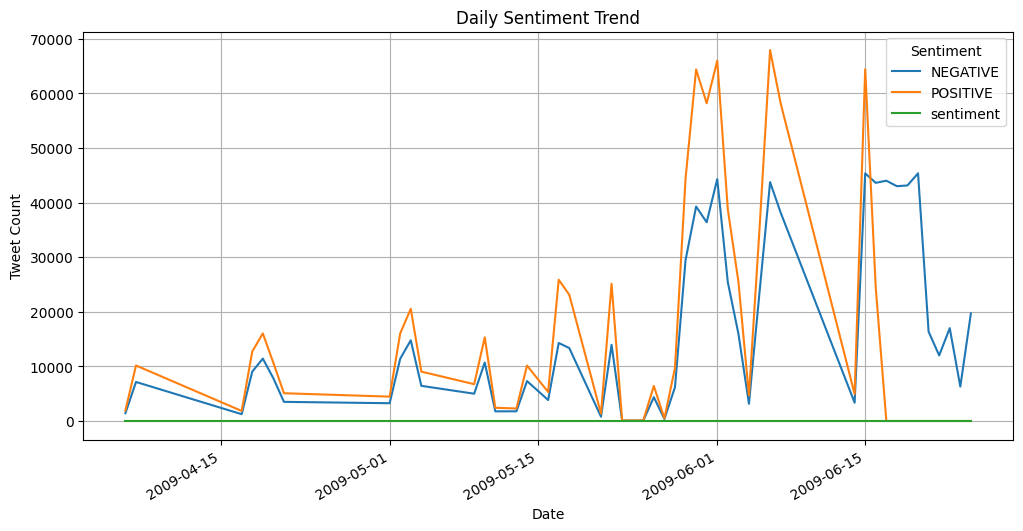

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
daily_sentiment['date'] = pd.to_datetime(daily_sentiment[['year', 'month', 'day']])

pivoted_daily = daily_sentiment.pivot(index='date', columns='sentiment', values='tweet_count').fillna(0)

plt.figure(figsize=(12, 6))
pivoted_daily.plot(ax=plt.gca())
plt.title('Daily Sentiment Trend')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.grid()
plt.show()

### 1.1: Quick Look

In [31]:
pivoted_daily['tweet_count'] = pivoted_daily['POSITIVE'] + pivoted_daily['NEGATIVE']

peak_tweet_day = pivoted_daily['tweet_count'].idxmax()
peak_positive_day = pivoted_daily['POSITIVE'].idxmax()
peak_negative_day = pivoted_daily['NEGATIVE'].idxmax()

print(f"Peak tweet day: {peak_tweet_day}")
print(f"Peak positive sentiment day: {peak_positive_day}")
print(f"Peak negative sentiment day: {peak_negative_day}")

Peak tweet day: 2009-06-06 00:00:00
Peak positive sentiment day: 2009-06-06 00:00:00
Peak negative sentiment day: 2009-06-20 00:00:00


In [39]:
pivoted_daily_2 = pivoted_daily.iloc[1:]

lowest_tweet_day = pivoted_daily_2['tweet_count'].idxmin()
lowest_positive_day = pivoted_daily_2['POSITIVE'].idxmin()
lowest_negative_day = pivoted_daily_2['NEGATIVE'].idxmin()

print(f"Lowest tweet day: {lowest_tweet_day}")
print(f"Lowest positive sentiment day: {lowest_positive_day}")
print(f"Lowest negative sentiment day: {lowest_negative_day}")

Lowest tweet day: 2009-05-23 00:00:00
Lowest positive sentiment day: 2009-06-17 00:00:00
Lowest negative sentiment day: 2009-05-25 00:00:00


### 1.2: Further inference:

a) What happend from 1/5/2009 to 23/5/2009

In [45]:
mask = (daily_sentiment['date'] > '2009-04-30') & (daily_sentiment['date'] <= '2009-5-24')
d1Tod23_daily_sentiment = daily_sentiment.loc[mask]
print(d1Tod23_daily_sentiment)

     day  month    year sentiment  tweet_count       date
14   1.0    5.0  2009.0  NEGATIVE         3254 2009-05-01
15   1.0    5.0  2009.0  POSITIVE         4462 2009-05-01
16   2.0    5.0  2009.0  POSITIVE        16036 2009-05-02
17   2.0    5.0  2009.0  NEGATIVE        11398 2009-05-02
18   3.0    5.0  2009.0  NEGATIVE        14779 2009-05-03
19   3.0    5.0  2009.0  POSITIVE        20554 2009-05-03
20   4.0    5.0  2009.0  NEGATIVE         6438 2009-05-04
21   4.0    5.0  2009.0  POSITIVE         9043 2009-05-04
22   9.0    5.0  2009.0  POSITIVE         6742 2009-05-09
23   9.0    5.0  2009.0  NEGATIVE         4997 2009-05-09
24  10.0    5.0  2009.0  NEGATIVE        10702 2009-05-10
25  10.0    5.0  2009.0  POSITIVE        15327 2009-05-10
26  11.0    5.0  2009.0  POSITIVE         2421 2009-05-11
27  11.0    5.0  2009.0  NEGATIVE         1765 2009-05-11
28  13.0    5.0  2009.0  POSITIVE         2290 2009-05-13
29  13.0    5.0  2009.0  NEGATIVE         1776 2009-05-13
30  14.0    5.

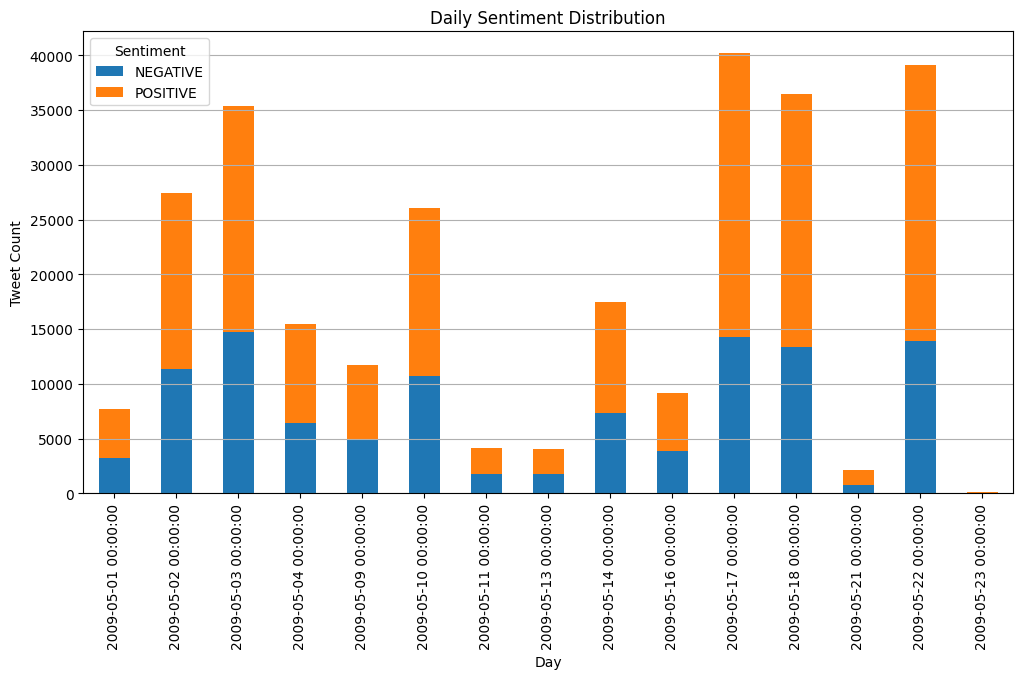

In [47]:
d1Tod23_pivoted_daily = d1Tod23_daily_sentiment.pivot(index='date', columns='sentiment', values='tweet_count').fillna(0)

plt.figure(figsize=(12, 6))
d1Tod23_pivoted_daily.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Daily Sentiment Distribution')
plt.xlabel('Day')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.show()

In [49]:
d1Tod23 = pd.read_csv("./data/d1_d23_m5.csv")

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,3), max_features=5000)
X = vectorizer.fit_transform(d1Tod23['clean_content'])

# Fit LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Display topics
for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic #{index+1}: {', '.join(top_words)}")

Topic #1: sunday morning, jonas brothers, hours sleep, going miss, good morning, feel good, best friend, sounds good, really good, good day
Topic #2: gon na miss, fall asleep, na miss, oh yeah, youre welcome, really want, gon na, happy birthday, good luck, good morning
Topic #3: start day, new york, ta love, monday morning, oh god, feel bad, great weekend, thanks following, great time, gon na
Topic #4: sleep night, sore throat, wont let, love song, hope good, thanks follow, thank god, thats good, day today, great day
Topic #5: home work, late night, angels demons, ill try, long day, going work, wait till, bank holiday, sorry hear, let know
Topic #6: thats cool, thanks followfriday, little bit, day tomorrow, school tomorrow, good times, hope youre, pretty good, nice day, work today
Topic #7: today going, come home, work day, high school, say hi, havent seen, day weekend, going home, going sleep, good night
Topic #8: sweet dreams, better soon, work tomorrow, think ill, really really, ha 

In [55]:
# Assign dominant topic to each tweet
topic_assignments = lda.transform(X).argmax(axis=1)
d1Tod23['topic'] = topic_assignments

topic_counts = d1Tod23['topic'].value_counts()
print(topic_counts)

topic
0    167997
8     13473
1     13400
4     12444
6     11819
2     11639
7     11628
9     11427
3     11391
5     11370
Name: count, dtype: int64


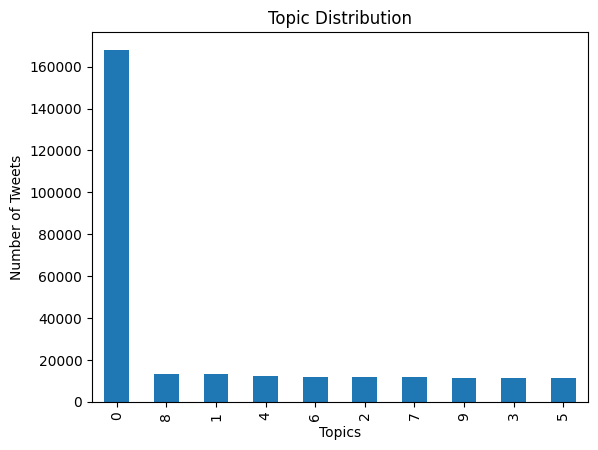

In [56]:
# Plot topic distribution
topic_counts.plot(kind='bar')
plt.xlabel("Topics")
plt.ylabel("Number of Tweets")
plt.title("Topic Distribution")
plt.show()

b) What happend from 24/5/2009 to 16/6/2009

In [58]:
mask = (daily_sentiment['date'] > '2009-05-23') & (daily_sentiment['date'] < '2009-6-17')
d24_m5_d16_m6_daily_sentiment = daily_sentiment.loc[mask]
print(d24_m5_d16_m6_daily_sentiment)

     day  month    year sentiment  tweet_count       date
44  25.0    5.0  2009.0  POSITIVE           98 2009-05-25
45  25.0    5.0  2009.0  NEGATIVE           71 2009-05-25
46  26.0    5.0  2009.0  POSITIVE         6421 2009-05-26
47  26.0    5.0  2009.0  NEGATIVE         4357 2009-05-26
48  27.0    5.0  2009.0  POSITIVE          474 2009-05-27
49  27.0    5.0  2009.0  NEGATIVE          367 2009-05-27
50  28.0    5.0  2009.0  POSITIVE         9717 2009-05-28
51  28.0    5.0  2009.0  NEGATIVE         6186 2009-05-28
52  29.0    5.0  2009.0  POSITIVE        44376 2009-05-29
53  29.0    5.0  2009.0  NEGATIVE        29451 2009-05-29
54  30.0    5.0  2009.0  NEGATIVE        39279 2009-05-30
55  30.0    5.0  2009.0  POSITIVE        64394 2009-05-30
56  31.0    5.0  2009.0  POSITIVE        58188 2009-05-31
57  31.0    5.0  2009.0  NEGATIVE        36400 2009-05-31
58   1.0    6.0  2009.0  NEGATIVE        44297 2009-06-01
59   1.0    6.0  2009.0  POSITIVE        65993 2009-06-01
60   2.0    6.

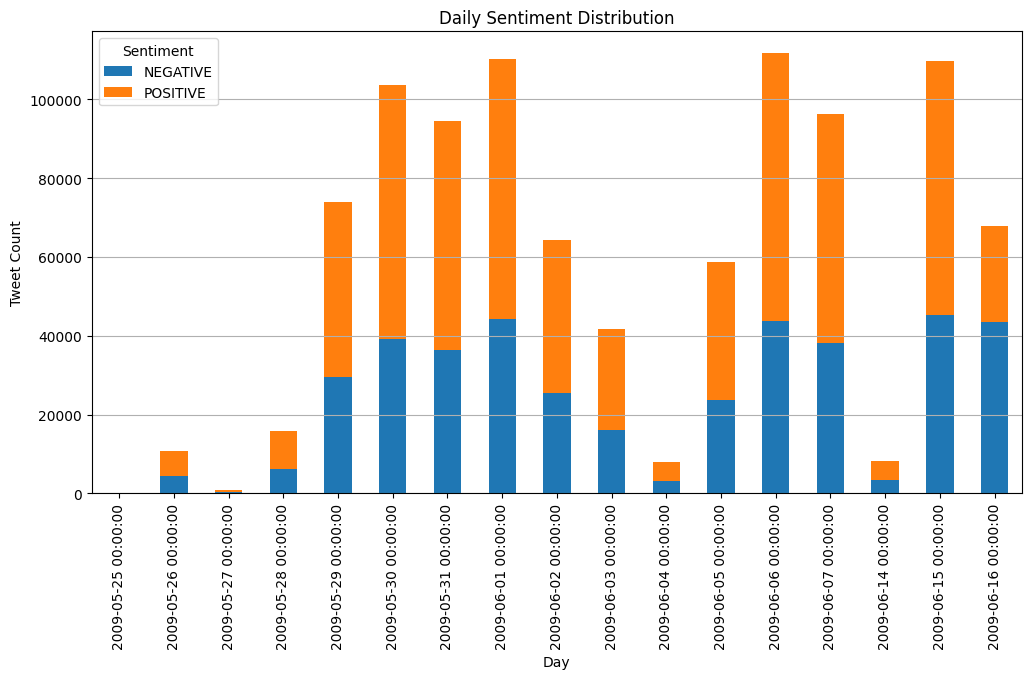

In [59]:
d24_m5_d16_m6_pivoted_daily = d24_m5_d16_m6_daily_sentiment.pivot(index='date', columns='sentiment', values='tweet_count').fillna(0)

plt.figure(figsize=(12, 6))
d24_m5_d16_m6_pivoted_daily.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Daily Sentiment Distribution')
plt.xlabel('Day')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.show()

In [57]:
d24_m5_d16_m6 = pd.read_csv("./data/d24_m5_d16_m6.csv")

In [61]:
# Vectorize the text data
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stopwords = {'just', 'dont', 'think', 'know', 'thanks', 'amp', 'im', 'like', 'youre'}
extended_stopwords = list(ENGLISH_STOP_WORDS.union(custom_stopwords))

vectorizer = CountVectorizer(stop_words=extended_stopwords, ngram_range=(2,3), max_features=5000)
X = vectorizer.fit_transform(d24_m5_d16_m6['clean_content'])

# Fit LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Display topics
for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic #{index+1}: {', '.join(top_words)}")

Topic #1: hope great, love new, new album, makes sad, ive seen, oh yeah, feel bad, thank god, got home, going bed
Topic #2: hope feel better, hope feel, love love, thats awesome, school tomorrow, whats wrong, wait till, long day, thats good, feel better
Topic #3: followers day, june th, say hi, make sure, day work, best friend, mtv movie awards, mtv movie, movie awards, great day
Topic #4: day tomorrow, day school, ill try, good time, wont let, sweet dreams, pretty good, really really, work tomorrow, really good
Topic #5: new moon trailer, didnt work, moon trailer, going home, love song, going miss, feel good, beautiful day, really want, new moon
Topic #6: hours sleep, glad hear, make feel, id love, year old, great night, wish luck, work today, sorry hear, happy birthday
Topic #7: gotta love, god bless, sore throat, love ya, going work, busy day, doesnt work, way home, fall asleep, gonna miss
Topic #8: little bit, air france, high school, got new, jonas brothers, sounds good, nice day,

c) What happend from 17/6/2009

In [68]:
mask = daily_sentiment['date'] > '2009-6-16'
d17_m6_daily_sentiment = daily_sentiment.loc[mask]
print(d17_m6_daily_sentiment)

     day  month    year sentiment  tweet_count       date
78  17.0    6.0  2009.0  NEGATIVE        44012 2009-06-17
79  18.0    6.0  2009.0  NEGATIVE        43004 2009-06-18
80  19.0    6.0  2009.0  NEGATIVE        43136 2009-06-19
81  20.0    6.0  2009.0  NEGATIVE        45364 2009-06-20
82  21.0    6.0  2009.0  NEGATIVE        16360 2009-06-21
83  22.0    6.0  2009.0  NEGATIVE        12009 2009-06-22
84  23.0    6.0  2009.0  NEGATIVE        17002 2009-06-23
85  24.0    6.0  2009.0  NEGATIVE         6299 2009-06-24
86  25.0    6.0  2009.0  NEGATIVE        19694 2009-06-25


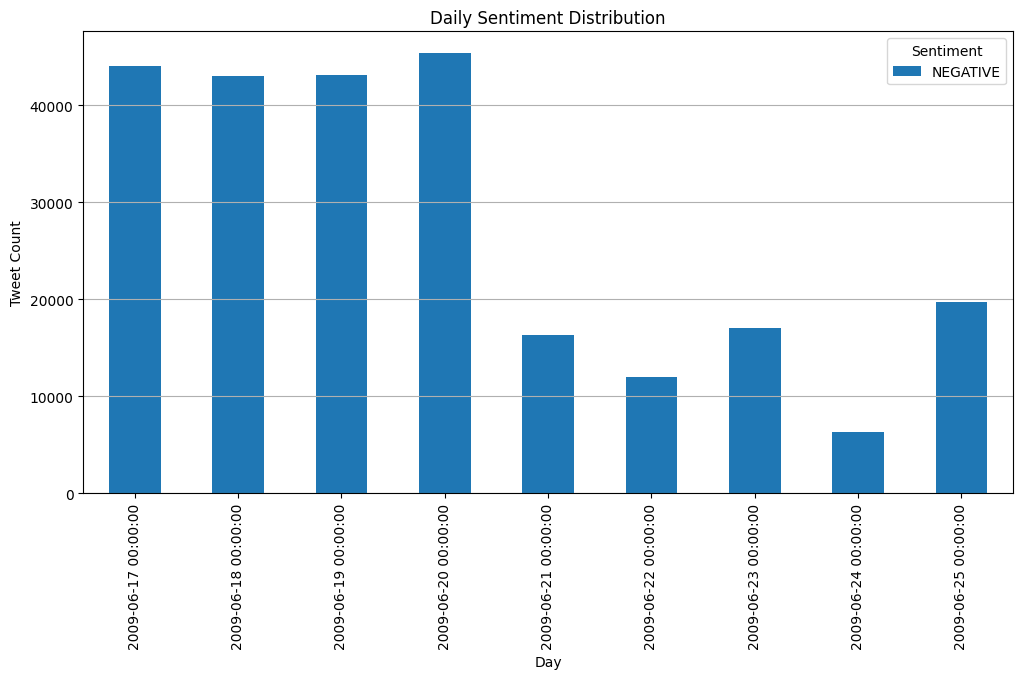

In [69]:
d17_m6_pivoted_daily = d17_m6_daily_sentiment.pivot(index='date', columns='sentiment', values='tweet_count').fillna(0)

plt.figure(figsize=(12, 6))
d17_m6_pivoted_daily.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Daily Sentiment Distribution')
plt.xlabel('Day')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.show()

In [70]:
d17_m6 = pd.read_csv("./data/d17_m6.csv")

In [71]:
# Vectorize the text data
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stopwords = {'just', 'dont', 'think', 'know', 'thanks', 'amp', 'im', 'like', 'youre'}
extended_stopwords = list(ENGLISH_STOP_WORDS.union(custom_stopwords))

vectorizer = CountVectorizer(stop_words=extended_stopwords, ngram_range=(2,3), max_features=5000)
X = vectorizer.fit_transform(d17_m6['clean_content'])

# Fit LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Display topics
for index, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic #{index+1}: {', '.join(top_words)}")

Topic #1: wisdom teeth, early morning, makes feel, gotta work, guess ill, hours sleep, far away, feel good, oh god, work tomorrow
Topic #2: really tired, work tonight, really wanted, oh dear, really wanna, new phone, swine flu, sore throat, didnt work, really really
Topic #3: id love, work hours, friday night, new york, miss guys, need sleep, home work, work day, going home, makes sad
Topic #4: bad day, thats good, long time, oh man, good day, wait till, havent seen, day today, ill miss, work today
Topic #5: better soon, ice cream, happy fathers day, wont let, happy fathers, feel bad, feel better, looking forward, sorry hear, fathers day
Topic #6: bad news, fell asleep, good home, iphone gs, tummy hurts, isnt working, new iphone, really bad, whats wrong, going bed
Topic #7: feeling sick, year old, sad face, wont work, thank god, wanna home, need new, day tomorrow, getting sick, wont able
Topic #8: head hurts, come home, best friend, feel sick, fall asleep, doesnt work, got home, good m

## 2: Hourly sentiment distribution

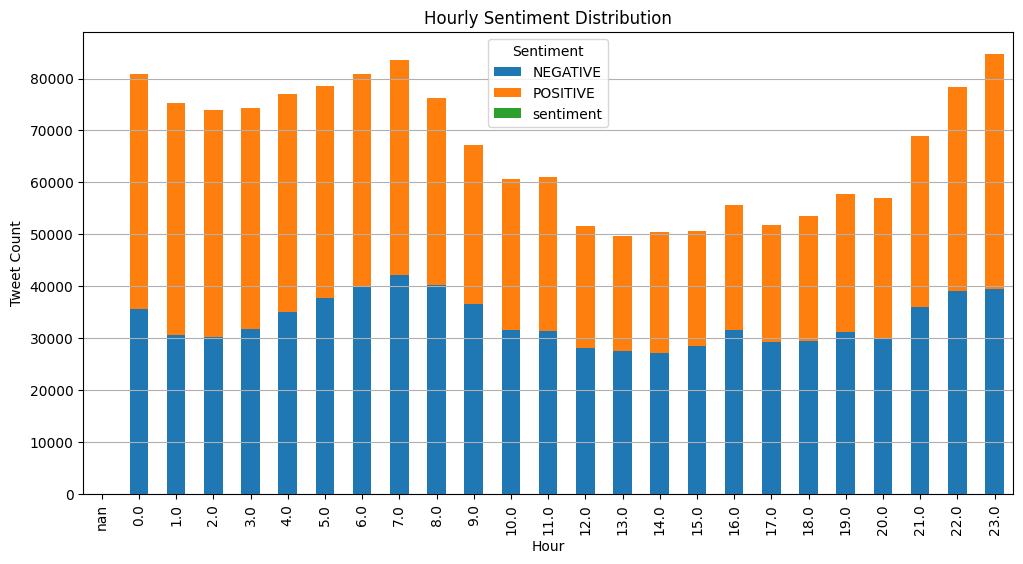

In [63]:
pivoted_hourly = hourly_sentiment.pivot(index='hour', columns='sentiment', values='tweet_count').fillna(0)

plt.figure(figsize=(12, 6))
pivoted_hourly.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Hourly Sentiment Distribution')
plt.xlabel('Hour')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.show()

In [64]:
pivoted_hourly['tweet_count'] = pivoted_hourly['POSITIVE'] + pivoted_hourly['NEGATIVE']

peak_tweet_hour = pivoted_hourly['tweet_count'].idxmax()
peak_positive_hour = pivoted_hourly['POSITIVE'].idxmax()
peak_negative_hour = pivoted_hourly['NEGATIVE'].idxmax()

print(f"Peak tweet hour: {peak_tweet_hour}")
print(f"Peak positive sentiment hour: {peak_positive_hour}")
print(f"Peak negative sentiment hour: {peak_negative_hour}")

Peak tweet hour: 23.0
Peak positive sentiment hour: 0.0
Peak negative sentiment hour: 7.0


<Axes: >

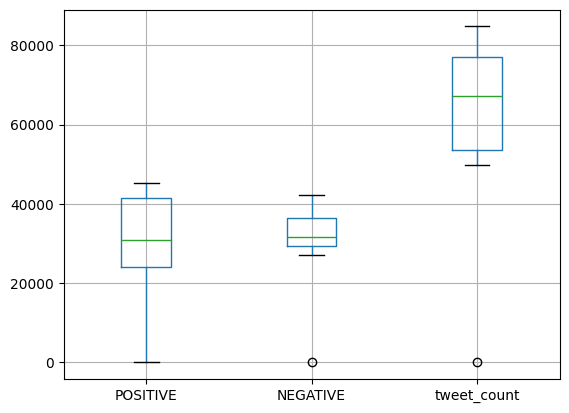

In [67]:
pivoted_hourly.boxplot(column=['POSITIVE', 'NEGATIVE', 'tweet_count'])

## 3: Positive and Negative Ratio

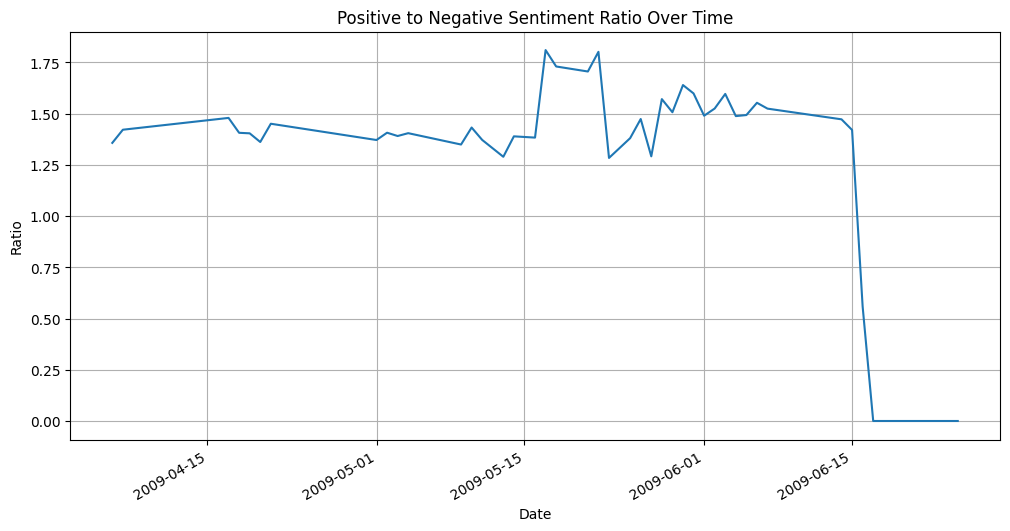

In [12]:
pivoted_daily['positive_negative_ratio'] = pivoted_daily['POSITIVE'] / pivoted_daily['NEGATIVE']
pivoted_daily['positive_negative_ratio'].plot(figsize=(12, 6))
plt.title('Positive to Negative Sentiment Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.grid()
plt.show()

# II. Content-Based Analysis

In [14]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load data
tweets = pd.read_csv('./data/data.csv')

# Preprocessing
def preprocess_text(text):
    # Tokenize and remove stopwords
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in words if word not in stop_words])

# Apply preprocessing
tweets['cleaned_content'] = tweets['clean_content'].apply(preprocess_text)

## 1: Most frequency word

In [16]:
from collections import Counter

# Get all words
all_words = ' '.join(tweets['cleaned_content']).split()

# Count most common words
word_freq = Counter(all_words)
print(word_freq.most_common(20))

[('im', 178365), ('good', 89420), ('day', 84818), ('get', 81600), ('like', 77781), ('go', 72982), ('got', 69833), ('dont', 67300), ('today', 64631), ('going', 64099), ('love', 63490), ('work', 62891), ('cant', 62890), ('time', 56129), ('back', 55987), ('lol', 55175), ('u', 53066), ('one', 52206), ('know', 51204), ('really', 49564)]


## 2: Sentiment-Based most frequency word

In [17]:
from nltk.corpus import opinion_lexicon

positive_tweets = tweets[tweets['sentiment'] == 'POSITIVE']['cleaned_content']
negative_tweets = tweets[tweets['sentiment'] == 'NEGATIVE']['cleaned_content']

positive_words = ' '.join(positive_tweets).split()
negative_words = ' '.join(negative_tweets).split()

negative_lexicon = set(opinion_lexicon.negative())
positive_lexicon = set(opinion_lexicon.positive())

negative_words_filtered = [word for word in negative_words if word in negative_lexicon]
positive_words_filtered = [word for word in positive_words if word in positive_lexicon]

negative_freq = Counter(negative_words_filtered)
positive_freq = Counter(positive_words_filtered)

print("Filtered Negative Words:", negative_freq.most_common(20))
print()
print("Filtered Positive Words:", positive_freq.most_common(20))

Filtered Negative Words: [('miss', 30510), ('sad', 27149), ('bad', 21365), ('sorry', 20318), ('hate', 17043), ('sick', 14175), ('tired', 11627), ('sucks', 9674), ('lost', 9384), ('damn', 8880), ('missed', 8406), ('ugh', 8314), ('bored', 7953), ('poor', 7211), ('hurts', 7062), ('cold', 6370), ('hard', 6097), ('stupid', 5527), ('headache', 5144), ('shit', 5094)]

Filtered Positive Words: [('good', 60865), ('love', 46861), ('like', 37116), ('great', 24883), ('well', 24556), ('happy', 20123), ('work', 18799), ('fun', 18063), ('nice', 16629), ('thank', 15403), ('awesome', 14131), ('right', 12492), ('better', 12255), ('best', 11067), ('cool', 10238), ('yay', 10220), ('amazing', 8826), ('glad', 8143), ('ready', 7713), ('pretty', 7697)]


## 3: WordCloud

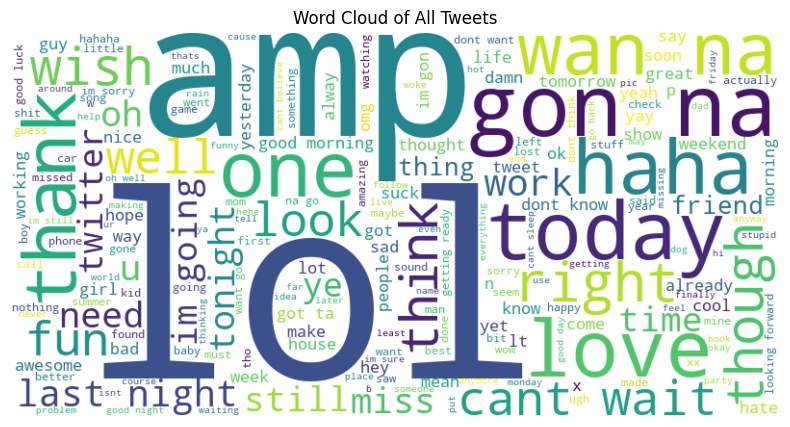

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for all tweets
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()

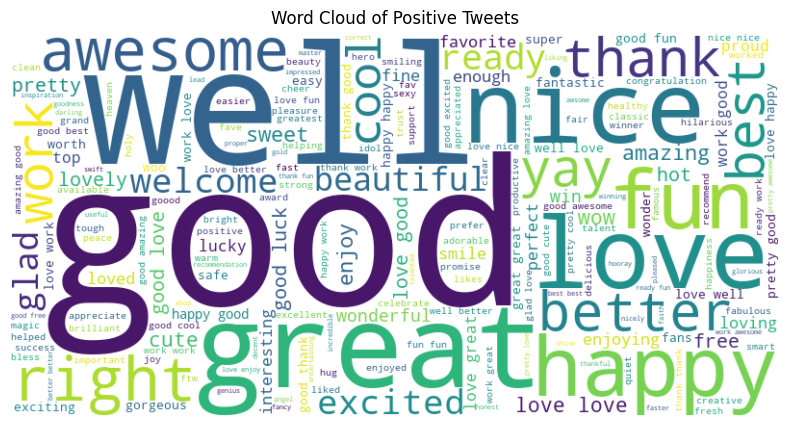

In [19]:
# Positive tweet wordcloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words_filtered))
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Tweets")
plt.show()

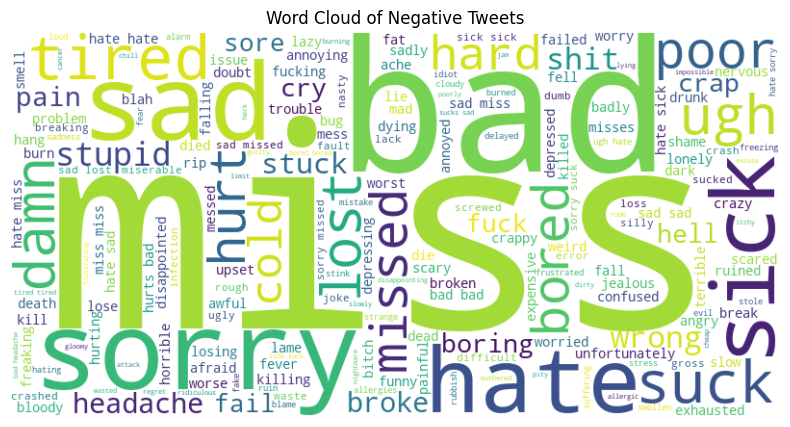

In [20]:
# Negative tweet wordcloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words_filtered))
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Tweets")
plt.show()